In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
plt.style.use(mplhep.style.CMS)

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

save_figures = False

Welcome to JupyROOT 6.24/00
{'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}
Luminosity: 37.190432966


In [3]:
help( process_data_protons_multiRP )

Help on function process_data_protons_multiRP in module processing:

process_data_protons_multiRP(df_protons_multiRP, df_ppstracks=None, apply_fiducial=True, within_aperture=False, random_protons=False, mix_protons=False, select_2protons=True, runOnMC=False)



In [ ]:
# def get_data( fileNames ):
    
#     df_protons_multiRP_list = []
#     df_protons_singleRP_list = []
#     df_ppstracks_list = []
#     df_counts_list = []

#     for file_ in fileNames:
#         print ( file_ )
#         with h5py.File( file_, 'r' ) as f:
#             print ( list(f.keys()) )

#             dset_protons_multiRP = f['protons_multiRP']
#             print ( dset_protons_multiRP.shape )
#             print ( dset_protons_multiRP[:,:] )

#             dset_protons_singleRP = f['protons_singleRP']
#             print ( dset_protons_singleRP.shape )
#             print ( dset_protons_singleRP[:,:] )

#             dset_ppstracks = f['ppstracks']
#             print ( dset_ppstracks.shape )
#             print ( dset_ppstracks[:,:] )

#             dset_columns_protons = f['columns_protons']
#             print ( dset_columns_protons.shape )
#             columns_protons = list( dset_columns_protons )
#             print ( columns_protons )
#             columns_protons_str = [ item.decode("utf-8") for item in columns_protons ]
#             print ( columns_protons_str )

#             dset_columns_ppstracks = f['columns_ppstracks']
#             print ( dset_columns_ppstracks.shape )
#             columns_ppstracks = list( dset_columns_ppstracks )
#             print ( columns_ppstracks )
#             columns_ppstracks_str = [ item.decode("utf-8") for item in columns_ppstracks ]
#             print ( columns_ppstracks_str )

#             dset_selections = f['selections']
#             selections_ = [ item.decode("utf-8") for item in dset_selections ]
#             print ( selections_ )

#             dset_counts = f['event_counts']
#             df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
#             print ( df_counts_list[-1] )

#             chunk_size = 1000000
#             entries_protons_multiRP = dset_protons_multiRP.shape[0]
#             start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_multiRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_multiRP_list.append( df_ )
#                 print ( df_protons_multiRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

#             entries_protons_singleRP = dset_protons_singleRP.shape[0]
#             start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_singleRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_singleRP_list.append( df_ )
#                 print ( df_protons_singleRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

#             entries_ppstracks = dset_ppstracks.shape[0]
#             start_ = list( range( 0, entries_ppstracks, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_ppstracks )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks_str ).astype( { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "rpid": "int32" } )
#                 df_ppstracks_list.append( df_ )
#                 print ( df_ppstracks_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

#     df_counts = df_counts_list[0]
#     for idx in range( 1, len( df_counts_list ) ):
#         df_counts = df_counts.add( df_counts_list[idx] )
#     print ( df_counts )

#     df_protons_multiRP = pd.concat( df_protons_multiRP_list )
#     print (df_protons_multiRP)

#     df_protons_singleRP = pd.concat( df_protons_singleRP_list )
#     print (df_protons_singleRP)

#     df_ppstracks = pd.concat( df_ppstracks_list )
#     print (df_ppstracks)
    
#     return (df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks)

In [ ]:
# run_ranges_periods = {}
# run_ranges_periods[ "2017B" ]  = (297020,299329)
# run_ranges_periods[ "2017C1" ] = (299337,300785)
# run_ranges_periods[ "2017C2" ] = (300806,302029)
# run_ranges_periods[ "2017D" ]  = (302030,303434)
# run_ranges_periods[ "2017E" ]  = (303435,304826)
# run_ranges_periods[ "2017F1" ] = (304911,305114)
# run_ranges_periods[ "2017F2" ] = (305178,305902)
# run_ranges_periods[ "2017F3" ] = (305965,306462)
# df_run_ranges = pd.DataFrame( run_ranges_periods, index=("min","max") ).transpose()

# aperture_period_map = {
#     "2016_preTS2"  : "2016_preTS2",
#     "2016_postTS2" : "2016_postTS2",
#     "2017B"        : "2017_preTS2",
#     "2017C1"       : "2017_preTS2",
#     "2017C2"       : "2017_preTS2",
#     "2017D"        : "2017_preTS2",
#     "2017E"        : "2017_postTS2",
#     "2017F1"       : "2017_postTS2",
#     "2017F2"       : "2017_postTS2",
#     "2017F3"       : "2017_postTS2",
#     "2018"         : "2018"
# }

In [ ]:
# # Per data period, arm=(0,1)
# # Periods: "2016_preTS2", "2016_postTS2", "2017_preTS2", "2017_postTS2", "2018"
# def aperture_parametrisation( period, arm, xangle, xi ):

#     #https://github.com/cms-sw/cmssw/tree/916cb3d20213734a0465240720c8c8c392b92eac/Validation/CTPPS/python/simu_config

#     if (period == "2016_preTS2"):
#         if   (arm == 0): return 3.76296E-05+((xi<0.117122)*0.00712775+(xi>=0.117122)*0.0148651)*(xi-0.117122);
#         elif (arm == 1): return 1.85954E-05+((xi<0.14324)*0.00475349+(xi>=0.14324)*0.00629514)*(xi-0.14324);
#     elif (period == "2016_postTS2"):
#         if   (arm == 0): return 6.10374E-05+((xi<0.113491)*0.00795942+(xi>=0.113491)*0.01935)*(xi-0.113491);
#         elif (arm == 1): return (xi-0.110)/130.0;
#     elif (period == "2017_preTS2"):
#         if   (arm == 0): return -(8.71198E-07*xangle-0.000134726)+((xi<(0.000264704*xangle+0.081951))*-(4.32065E-05*xangle-0.0130746)+(xi>=(0.000264704*xangle+0.081951))*-(0.000183472*xangle-0.0395241))*(xi-(0.000264704*xangle+0.081951));
#         elif (arm == 1): return 3.43116E-05+((xi<(0.000626936*xangle+0.061324))*0.00654394+(xi>=(0.000626936*xangle+0.061324))*-(0.000145164*xangle-0.0272919))*(xi-(0.000626936*xangle+0.061324));
#     elif (period == "2017_postTS2"):
#         if   (arm == 0): return -(8.92079E-07*xangle-0.000150214)+((xi<(0.000278622*xangle+0.0964383))*-(3.9541e-05*xangle-0.0115104)+(xi>=(0.000278622*xangle+0.0964383))*-(0.000108249*xangle-0.0249303))*(xi-(0.000278622*xangle+0.0964383));
#         elif (arm == 1): return 4.56961E-05+((xi<(0.00075625*xangle+0.0643361))*-(3.01107e-05*xangle-0.00985126)+(xi>=(0.00075625*xangle+0.0643361))*-(8.95437e-05*xangle-0.0169474))*(xi-(0.00075625*xangle+0.0643361));
#     elif (period == "2018"):
#         if   (arm == 0): return -(8.44219E-07*xangle-0.000100957)+((xi<(0.000247185*xangle+0.101599))*-(1.40289E-05*xangle-0.00727237)+(xi>=(0.000247185*xangle+0.101599))*-(0.000107811*xangle-0.0261867))*(xi-(0.000247185*xangle+0.101599));
#         elif (arm == 1): return -(-4.74758E-07*xangle+3.0881E-05)+((xi<(0.000727859*xangle+0.0722653))*-(2.43968E-05*xangle-0.0085461)+(xi>=(0.000727859*xangle+0.0722653))*-(7.19216E-05*xangle-0.0148267))*(xi-(0.000727859*xangle+0.0722653));
#     else:
#         return -999.

# def check_aperture( period, arm, xangle, xi, theta_x ):
#     return ( theta_x < -aperture_parametrisation( period, arm, xangle, xi ) )

In [ ]:
# def process_data_protons_multiRP( df_protons_multiRP, df_ppstracks=None, runOnMC=False ):

#     if not runOnMC:
#         df_protons_multiRP.loc[ :, "period" ] = np.nan
#         for idx_ in range( df_run_ranges.shape[0] ):
#             msk_period_ = ( ( df_protons_multiRP.loc[ :, "run" ] >= df_run_ranges.iloc[ idx_ ][ "min" ] ) & ( df_protons_multiRP.loc[ :, "run" ] <= df_run_ranges.iloc[ idx_ ][ "max" ] ) )
#             sum_period_ = np.sum( msk_period_ )
#             if sum_period_ > 0:
#                 period_key_ = df_run_ranges.index[ idx_ ]
#                 df_protons_multiRP.loc[ :, "period" ].loc[ msk_period_ ] = period_key_
#                 print ( "{}: {}".format( period_key_, sum_period_ ) )

#         df_protons_multiRP.loc[ :, "within_aperture" ] = df_protons_multiRP.apply(
#                 lambda row: check_aperture( aperture_period_map[ row["period"] ], row["arm"], 120., row["xi"], row["thx"] ), # FIXME
#                 axis=1
#                 )
    
#     df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )

#     df_ppstracks_index = None
#     if not df_ppstracks is None:
#         df_ppstracks_index = df_ppstracks.set_index( ['run', 'lumiblock', 'event', 'slice'] )
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_x2" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y2" ] = np.nan
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]

#     df_protons_multiRP_events = df_protons_multiRP_index.drop( columns=[ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm" ] )
#     df_protons_multiRP_events = df_protons_multiRP_events[ ~df_protons_multiRP_events.index.duplicated(keep='first') ]

#     df_protons_multiRP_events.loc[ :, "MX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 13000. * np.sqrt( df_.iloc[0].xi * df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "YX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 0.5 * np.log( df_.iloc[0].xi / df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "diffMWW_MX" ]  = df_protons_multiRP_events[ "recoMWW" ] - df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "ratioMWW_MX" ] = df_protons_multiRP_events[ "recoMWW" ] / df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "shiftedRatioMWW_MX" ] = df_protons_multiRP_events[ "ratioMWW_MX" ] - 1.
#     df_protons_multiRP_events.loc[ :, "diffYWW_YX" ]  = df_protons_multiRP_events[ "recoRapidityWW" ] - df_protons_multiRP_events[ "YX" ]
    
#     return (df_protons_multiRP_index, df_protons_multiRP_events, df_ppstracks_index)

### Signal

In [ ]:
# run_tables = False

# # labels_signals = [ "GGToWW-AQGC-A0W1e-6" ]
# labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]

# fileNames_signals = {
#     "GGToWW-AQGC-A0W1e-6": [ "output-GGToWW-AQGC-A0W1e-6.h5" ],
#     "GGToWW-AQGC-A0W2e-6": [ "output-GGToWW-AQGC-A0W2e-6.h5" ],
#     "GGToWW-AQGC-A0W5e-6": [ "output-GGToWW-AQGC-A0W5e-6.h5" ]
#     }

# df_counts_signals = {}
# df_signals_protons_multiRP_index = {}
# df_signals_protons_multiRP_events = {}

# for label_ in labels_signals:
#     import time
#     print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
#     time_s_ = time.time()

#     #df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = 4 * [None]
#     #df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = 3 * [None]

#     if run_tables:
#         with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), complevel=5 ) as store_:

#             df_counts_signal_, df_protons_multiRP_signal_, df_protons_singleRP_signal_, df_ppstracks_signal_ = get_data( fileNames_signals[ label_ ] )
#             df_protons_multiRP_signal_index_, df_protons_multiRP_signal_events_, df_ppstracks_signal_index_ = process_data_protons_multiRP( df_protons_multiRP_signal_, df_ppstracks_signal_, apply_fiducial=True, within_aperture=True, select_2protons=False, runOnMC=True )

#             store_[ "counts" ] = df_counts_signal_
#             store_[ "protons_multiRP"] = df_protons_multiRP_signal_index_
#             store_[ "events_multiRP" ] = df_protons_multiRP_signal_events_
    
#     with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
#         df_counts_signals[ label_ ] = store_[ "counts" ]
#         df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
#         df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

#     time_e_ = time.time()
#     print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
# for label_ in labels_signals:
#     with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
#         print ( list( store_ ) )

In [4]:
labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
for label_ in labels_signals:
    print ( label_ )
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
        print ( list( store_ ) )
        df_counts_signals[ label_ ] = store_[ "counts" ]
        df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
        df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [5]:
label_ = "GGToWW-AQGC-A0W1e-6"
df_counts_signals[ label_ ]

All       34159
Jet       34159
Muon      17498
Proton    12552
dtype: int64

In [6]:
df_signals_protons_multiRP_index[ label_ ].columns.values

array(['crossingAngle', 'betaStar', 'instLumi', 'xi', 'thx', 'thy', 't',
       'ismultirp', 'rpid', 'arm', 'random', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
       'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
       'jet0_pz', 'muon0_pt', 'muon0_eta', 'muon0_phi', 'muon0_energy',
       'muon0_charge', 'muon0_iso', 'muon0_dxy', 'muon0_dz', 'met',
       'met_x', 'met_y', 'met_phi', 'nVertices', 'num_bjets_ak8',
       'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks',
       'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW',
       'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicEta',
       'WLeptonicPhi', 'run_mc', 'pileupWeight', 'mc_pu_trueinteractions',
       'mcWeight', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup',
       'jet0_jer_sfdown', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi',
       'gen_jet0_energy', 'trackx1', 'tracky1', 'trackpixshift1', 'rpid1',
       'trackx2', 'tracky2', 'tr

In [6]:
df_signals_protons_multiRP_index[ label_ ]

crossingAngle  betaStar  instLumi        xi  \
run lumiblock event  slice                                                
1   2266      226549 0              120.0       0.4       0.0  0.049396   
              226551 0              120.0       0.4       0.0  0.047449   
                     0              120.0       0.4       0.0  0.051457   
    2267      226605 0              120.0       0.4       0.0  0.129090   
              226690 0              120.0       0.4       0.0  0.028568   
...                                   ...       ...       ...       ...   
    9051      405030 0              150.0       0.4       0.0  0.107774   
    9052      405137 0              130.0       0.4       0.0  0.109196   
    9057      405631 0              120.0       0.4       0.0  0.098174   
              405635 0              120.0       0.4       0.0  0.119186   
              405671 0              120.0       0.4       0.0  0.077515   

                                 thx       thy         t  ismultirp  rpid  \
run lumiblock event  slice                                                  
1   2266      226549 0      0.000070  0.000006 -0.202391          1   123   
              226551 0      0.000007  0.000021 -0.022129          1   123   
                     0      0.000022  0.000089 -0.342805          1   123   
    2267      226605 0      0.000042 -0.000010 -0.086362          1   123   
              226690 0      0.000061 -0.000014 -0.162398          1    23   
...                              ...       ...       ...        ...   ...   
    9051      405030 0     -0.000052  0.000093 -0.437632          1   103   
    9052      405137 0     -0.000054  0.000128 -0.733809          1    23   
    9057      405631 0     -0.000035 -0.000023 -0.076592          1   123   
              405635 0      0.000044  0.000081 -0.331256          1   123   
              405671 0      0.000018  0.000056 -0.140505          1   123   

                            arm  ...  eff_strictzero_2017F1  \
run lumiblock event  slice       ...                          
1   2266      226549 0        1  ...                 0.6053   
              226551 0        0  ...                 0.6803   
                     0        1  ...                 0.6053   
    2267      226605 0        1  ...                 0.6053   
              226690 0        0  ...                 0.6803   
...                         ...  ...                    ...   
    9051      405030 0        0  ...                 0.3593   
    9052      405137 0        0  ...                 0.4667   
    9057      405631 0        1  ...                 0.6053   
              405635 0        1  ...                 0.6053   
              405671 0        1  ...                 0.6053   

                            eff_proton_all_2017F2  eff_multitrack_2017F2  \
run lumiblock event  slice                                                 
1   2266      226549 0                   0.838289               0.439393   
              226551 0                   0.698553               0.483282   
                     0                   0.819445               0.439393   
    2267      226605 0                   0.870355               0.439393   
              226690 0                   0.007407               0.483282   
...                                           ...                    ...   
    9051      405030 0                   0.807378               0.483282   
    9052      405137 0                   0.887722               0.483282   
    9057      405631 0                   0.844394               0.439393   
              405635 0                   0.880244               0.439393   
              405671 0                   0.847527               0.439393   

                            eff_strictzero_2017F2  eff_proton_all_2017F3  \
run lumiblock event  slice                                                 
1   2266      226549 0                     0.6053               0.579756   
             

In [ ]:
df_signals_protons_multiRP_index[ label_ ][ [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random", "trackpixshift1", "rpid1", "trackpixshift2", "rpid2", "trackx1", "trackx2", "tracky1", "tracky2" ] ]

In [7]:
msk_columns_jet_ = [ key_[:len('jet')] == 'jet' for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_jet_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_jet_ ]
columns_ = [ "period" ]
columns_.extend( columns_jet_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period     jet0_pt  jet0_eta  jet0_phi  \
run lumiblock event  slice                                           
1   2266      226549 0       2017D  418.121246 -0.146196  3.120644   
              226551 0      2017F3  203.932037 -1.086163  0.536344   
                     0      2017F3  203.932037 -1.086163  0.536344   
    2267      226605 0      2017F2  820.272827 -0.485583  0.133567   
              226690 0      2017C1  518.140259 -0.514777 -1.798476   
...                            ...         ...       ...       ...   
    9051      405030 0      2017F3  720.453613 -0.052023 -1.700456   
    9052      405137 0      2017C2  967.927612 -0.493459 -2.725141   
    9057      405631 0       2017E  656.556946  1.106608 -3.082766   
              405635 0       2017E  213.274429  0.313337 -1.797812   
              405671 0       2017E  556.471008  0.815168  1.796866   

                            jet0_energy  jet0_mass  jet0_corrmass  jet0_tau1  \
run lumiblock event  slice                                                     
1   2266      226549 0       430.939484  71.164970      75.167931   0.219000   
              226551 0       341.780396  12.367921      13.346299   0.195710   
                     0       341.780396  12.367921      13.346299   0.195710   
    2267      226605 0       926.578125  74.552437      79.020950   0.133824   
              226690 0       602.417969  74.181328      78.666924   0.181825   
...                                 ...        ...            ...        ...   
    9051      405030 0       729.337708  67.942772      71.605843   0.080987   
    9052      405137 0      1093.672729  47.471439      50.255917   0.057132   
    9057      405631 0      1108.262207  74.000488      80.327408   0.158644   
              405635 0       229.383255   6.828653       7.209357   0.105936   
              405671 0       759.676697  14.423929      15.378687   0.104950   

                            jet0_tau2  jet0_vertexz  ...  jet0_px_jer_up  \
run lumiblock event  slice                           ...                   
1   2266      226549 0       0.090273           0.0  ...     -417.386940   
              226551 0       0.150335           0.0  ...      176.276755   
                     0       0.150335           0.0  ...      176.276755   
    2267      226605 0       0.035007           0.0  ...      812.704546   
              226690 0       0.111456           0.0  ...     -117.375690   
...                               ...           ...  ...             ...   
    9051      405030 0       0.041547           0.0  ...      -93.202441   
    9052      405137 0       0.034199           0.0  ...     -886.546064   
    9057      405631 0       0.051229           0.0  ...     -655.261271   
              405635 0       0.080291           0.0  ...      -48.033863   
              405671 0       0.080755           0.0  ...     -124.532128   

                            jet0_py_jer_up  jet0_pz_jer_up  jet0_pt_jer_dw  \
run lumiblock event  slice                                                   
1   2266      226549 0            8.744935      -61.251527      418.763978   
              226551 0          104.791447     -269.196248      202.789024   
                     0          104.791447     -269.196248      202.789024   
    2267      226605 0          109.200460     -414.015465      820.537592   
              226690 0         -506.590468     -279.669862      516.269967   
...                                    ...             ...             ...   
    9051      405030 0         -714.792806      -37.517463      720.063695   
    9052      405137 0         -392.139901     -498.011048      966.454630   
    9057      405631 0          -38.591473      883.971436      656.503714   
              405635 0         -207.940957       67.970931      213.132116   
              405671 0          541.440385      504.738824      557.366958   

                            jet0_energy_jer_dw  jet0_mass_jer_dw  \
run 

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   35.,  102.,  145.,  281.,  399.,
         506.,  702.,  833.,  969., 1165., 1165., 1223., 1243., 1249.,
        1118.,  952.,  746.,  595.,  441.,  326.,  195.,  106.,   50.,
          31.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ], dtype=float32),
 <BarContainer object of 50 artists>)

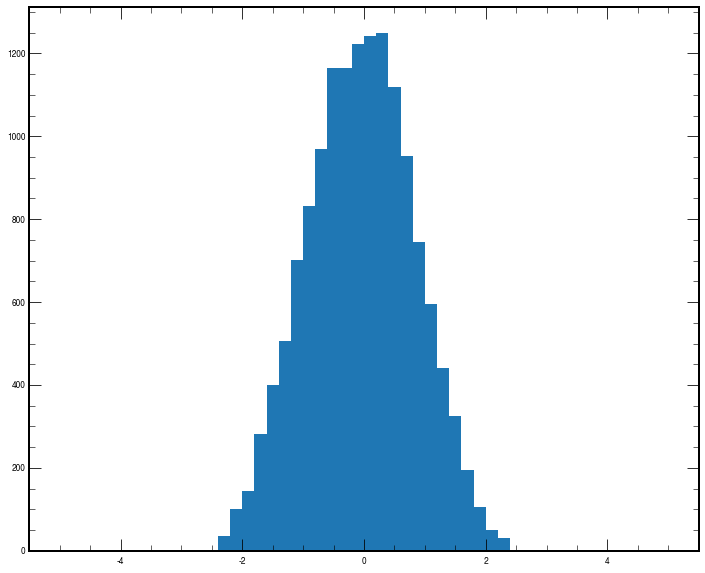

In [9]:
fig = plt.figure( figsize=(12,10) )
plt.hist( df_signals_protons_multiRP_index[ label_ ][ "jet0_eta" ], bins=50, range=(-5.,5.) )

In [ ]:
# df__ = df_signals_protons_multiRP_index[ label_ ]
# df__.loc[ :, 'jet0_pt_unsmeared' ] = np.sqrt(
#     df__.loc[ :, 'jet0_px' ] ** 2 +
#     df__.loc[ :, 'jet0_py' ] ** 2 )
# df__.loc[ :, 'C_JER_ref' ] = ( df__.loc[ :, 'jet0_pt' ] / df__.loc[ :, 'jet0_pt_unsmeared' ] )
# deltaPhi_jet_genjet_ = ( df__.loc[ :, "jet0_phi"] - df__.loc[ :, "gen_jet0_phi"] )
# msk_dphi_ = ( deltaPhi_jet_genjet_ < -np.pi )
# deltaPhi_jet_genjet_.loc[ msk_dphi_ ] = deltaPhi_jet_genjet_.loc[ msk_dphi_ ] + 2*np.pi
# msk_dphi_ = ( deltaPhi_jet_genjet_ >= np.pi )
# deltaPhi_jet_genjet_.loc[ msk_dphi_ ] = deltaPhi_jet_genjet_.loc[ msk_dphi_ ] - 2*np.pi
# deltaEta_jet_genjet_ = ( df__.loc[ :, "jet0_eta"] - df__.loc[ :, "gen_jet0_eta"] )
# deltaR_jet_genjet_ = np.sqrt( ( deltaPhi_jet_genjet_ ) ** 2 + ( deltaEta_jet_genjet_ ) ** 2 )
# df__.loc[ :, 'deltaR_jet_genjet' ] = deltaR_jet_genjet_
# df__.loc[ :, 'deltaPt_jet_genjet' ] = np.abs( df__.loc[ :, 'jet0_pt_unsmeared' ] - df__.loc[ :, 'gen_jet0_pt' ] )
# df__.loc[ :, 'match_jet_genjet' ] = ( ( df__.loc[ :, 'deltaR_jet_genjet' ] < ( 0.8 / 2 ) ) &
#                                       ( df__.loc[ :, 'deltaPt_jet_genjet' ] < ( 3. * df__.loc[ :, 'jet0_jer_res' ] * df__.loc[ :, 'jet0_pt_unsmeared' ] ) ) )  
# print ( np.sum( df__.loc[ :, 'match_jet_genjet' ] ) )
# print ( np.sum( df__.loc[ :, 'match_jet_genjet' ] ) / df__.shape[0] )

# # df__[ [ 'C_JER_ref', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ]
# df__[ [ 'C_JER_ref', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ].loc[ ~df__.loc[ :, 'match_jet_genjet' ] ]

In [ ]:
# df__.loc[ :, 'C_JER' ] = np.nan
# df__.loc[ :, 'JER_rand' ] = np.nan
# df__.loc[ :, 'C_JER_jer_up' ] = np.nan
# df__.loc[ :, 'C_JER_jer_dw' ] = np.nan
# msk_match_ = df__.loc[ :, 'match_jet_genjet' ]

# df__.loc[ :, 'C_JER' ].where( ~msk_match_, ( 1. + ( df__.loc[ :, 'jet0_jer_sf' ] - 1. ) *
#                                            ( ( df__.loc[ :, 'jet0_pt_unsmeared' ] - df__.loc[ :, 'gen_jet0_pt' ] ) / df__.loc[ :, 'jet0_pt_unsmeared' ] ) ),
#                                            inplace=True )
# df__.loc[ :, 'C_JER' ].where( msk_match_, df__.loc[ :, 'C_JER_ref' ], inplace=True )
# df__.loc[ :, 'JER_rand' ].where( msk_match_, ( ( df__.loc[ :, 'C_JER_ref' ] - 1. ) / np.sqrt( np.max( ( ( df__.loc[ :, 'jet0_jer_sf' ] ** 2 ) - 1. ) , 0. ) ) ), inplace=True )
# df__.loc[ :, 'C_JER_jer_up' ].where( ~msk_match_, ( 1. + ( df__.loc[ :, 'jet0_jer_sfup' ] - 1. ) *
#                                                   ( ( df__.loc[ :, 'jet0_pt_unsmeared' ] - df__.loc[ :, 'gen_jet0_pt' ] ) / df__.loc[ :, 'jet0_pt_unsmeared' ] ) ),
#                                                   inplace=True )
# df__.loc[ :, 'C_JER_jer_dw' ].where( ~msk_match_, ( 1. + ( df__.loc[ :, 'jet0_jer_sfdown' ] - 1. ) *
#                                                   ( ( df__.loc[ :, 'jet0_pt_unsmeared' ] - df__.loc[ :, 'gen_jet0_pt' ] ) / df__.loc[ :, 'jet0_pt_unsmeared' ] ) ),
#                                                   inplace=True )
# df__.loc[ :, 'C_JER_jer_up' ].where( msk_match_, ( 1. + df__.loc[ :, 'JER_rand' ] * np.sqrt( np.max( ( ( df__.loc[ :, 'jet0_jer_sfup' ] ** 2 ) - 1. ) , 0. ) ) ), inplace=True )
# df__.loc[ :, 'C_JER_jer_dw' ].where( msk_match_, ( 1. + df__.loc[ :, 'JER_rand' ] * np.sqrt( np.max( ( ( df__.loc[ :, 'jet0_jer_sfdown' ] ** 2 ) - 1. ) , 0. ) ) ), inplace=True )


In [13]:
df__ = df_signals_protons_multiRP_index[ label_ ]

# df__[ [ 'C_JER_ref', 'C_JER', 'JER_rand', 'C_JER_jer_up', 'C_JER_jer_dw', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ]
df__[ [ 'C_JER_ref', 'C_JER', 'JER_rand', 'C_JER_jer_up', 'C_JER_jer_dw', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ].loc[ df__.loc[ :, 'match_jet_genjet' ] ]
# df__[ [ 'C_JER_ref', 'C_JER', 'JER_rand', 'C_JER_jer_up', 'C_JER_jer_dw', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ].loc[ ~df__.loc[ :, 'match_jet_genjet' ] ]

C_JER_ref     C_JER  JER_rand  C_JER_jer_up  \
run lumiblock event  slice                                                
1   2266      226549 0       0.990182  0.990182       NaN      0.988660   
              226551 0       1.012306  1.012306       NaN      1.017967   
                     0       1.012306  1.012306       NaN      1.017967   
    2267      226605 0       0.997923  0.997923       NaN      0.997601   
              226690 0       1.023839  1.023839       NaN      1.027534   
...                               ...       ...       ...           ...   
    9051      405030 0       1.003503  1.003503       NaN      1.004047   
    9052      405137 0       1.009914  1.009914       NaN      1.011451   
    9057      405631 0       0.999637  0.999474       NaN      0.999393   
              405635 0       1.004323  1.004322       NaN      1.004993   
              405671 0       0.996520  0.996520       NaN      0.994920   

                            C_JER_jer_dw  jet0_jer_res  jet0_jer_sf  \
run lumiblock event  slice                                            
1   2266      226549 0          0.991704      0.061120       1.1432   
              226551 0          1.006632      0.093657       1.0989   
                     0          1.006632      0.093657       1.0989   
    2267      226605 0          0.998245      0.049777       1.1432   
              226690 0          1.020143      0.060702       1.1432   
...                                  ...           ...          ...   
    9051      405030 0          1.002960      0.051706       1.1432   
    9052      405137 0          1.008377      0.047453       1.1432   
    9057      405631 0          0.999556      0.052171       1.1432   
              405635 0          1.003652      0.083668       1.1432   
              405671 0          0.998125      0.062146       1.0989   

                            jet0_jer_sfup  jet0_jer_sfdown  jet0_pt_unsmeared  \
run lumiblock event  slice                                                      
1   2266      226549 0             1.1654           1.1210         422.267090   
              226551 0             1.1444           1.0533         201.453018   
                     0             1.1444           1.0533         201.453018   
    2267      226605 0             1.1654           1.1210         821.980347   
              226690 0             1.1654           1.1210         506.076050   
...                                   ...              ...                ...   
    9051      405030 0             1.1654           1.1210         717.938354   
    9052      405137 0             1.1654           1.1210         958.426025   
    9057      405631 0             1.1654           1.1210         656.795349   
              405635 0             1.1654           1.1210         212.356522   
              405671 0             1.1444           1.0533         558.414124   

                            ...     jet0_py  jet0_pt_nom  jet0_px_nom  \
run lumiblock event  slice  ...                                         
1   2266      226549 0      ...    8.845284   418.121246  -418.029510   
              226551 0      ...  102.941879   203.932037   175.296402   
                     0      ...  102.941879   203.932037   175.296402   
    2267      226605 0      ...  109.463097   820.272827   812.966858   
              226690 0      ... -493.015594   518.140259  -116.953529   
...                         ...         ...          ...          ...   
    9051      405030 0      ... -711.911987   720.453613   -93.152023   
    9052      405137 0      ... -387.700470   967.927612  -885.198914   
    9057      405631 0      ...  -38.614944   656.556946  -655.421265   
              405635 0      ... -206.907959   213.274429   -48.001839   
              405671 0      ...  544.205200   556.471008  -124.732491   

                            jet0_py_nom  gen_jet0_pt  gen_jet0_eta  \
run lumiblock event  slice                            

In [14]:
msk_match_ = df__.loc[ :, 'match_jet_genjet' ]
print ( np.mean( df__.loc[ msk_match_ ].loc[ :, 'C_JER' ] - df__.loc[ msk_match_ ].loc[ :, 'C_JER_ref' ] ) ) 
print ( np.std( df__.loc[ msk_match_ ].loc[ :, 'C_JER' ] - df__.loc[ msk_match_ ].loc[ :, 'C_JER_ref' ] ) )
print ( np.mean( df__.loc[ ~msk_match_ ].loc[ :, 'JER_rand' ] ) )
print ( np.std( df__.loc[ ~msk_match_ ].loc[ :, 'JER_rand' ] ) )

-1.046636896514724e-05
0.0011922528358014241
0.037038352497286035
0.02717471331200834


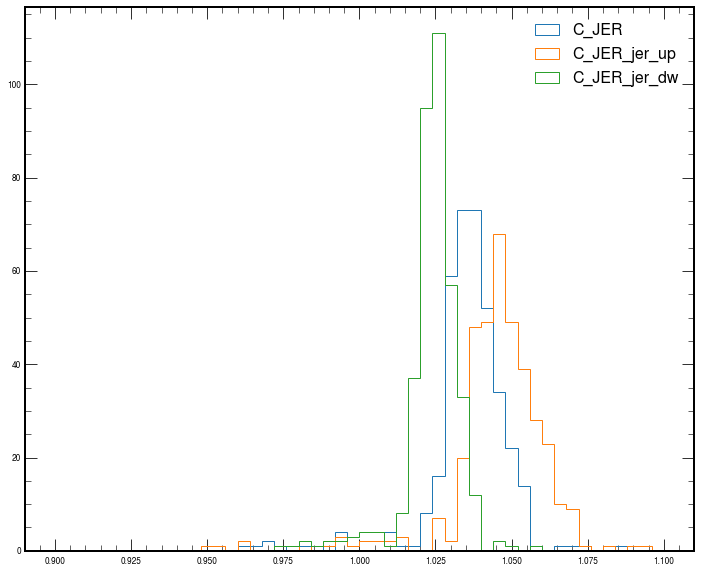

In [15]:
fig = plt.figure( figsize=(12,10) )
# plt.hist( df__.loc[ ~msk_match_ ].loc[ :, 'JER_rand' ], bins=50, range=(-0.2, 0.2) )
# plt.hist( ( df__.loc[ msk_match_ ].loc[ :, 'C_JER' ] - df__.loc[ msk_match_ ].loc[ :, 'C_JER_ref' ] ), bins=50, range=(-0.05, 0.05) )
plt.hist( ( df__.loc[ ~msk_match_ ].loc[ :, 'C_JER_ref' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER' )
plt.hist( ( df__.loc[ ~msk_match_ ].loc[ :, 'C_JER_jer_up' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER_jer_up' )
plt.hist( ( df__.loc[ ~msk_match_ ].loc[ :, 'C_JER_jer_dw' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER_jer_dw' )
plt.legend( loc='best', fontsize=16 )
# plt.hist( ( df__.loc[ msk_match_ ].loc[ :, 'C_JER_ref' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER' )
# plt.hist( ( df__.loc[ msk_match_ ].loc[ :, 'C_JER_jer_up' ] / df__.loc[ :, 'C_JER' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER_jer_up' )
# plt.hist( ( df__.loc[ msk_match_ ].loc[ :, 'C_JER_jer_dw' ] / df__.loc[ :, 'C_JER' ] ), bins=100, range=(0.90, 1.10), histtype='step', label='C_JER_jer_dw' )
# plt.legend( loc='best', fontsize=16 )

In [8]:
msk_columns_jes_ = [ key_.find( 'jes' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_jes_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_jes_ ]
columns_ = [ "period" ]
columns_.extend( columns_jes_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period  jet0_pt_jes_up  jet0_energy_jes_up  \
run lumiblock event  slice                                               
1   2266      226549 0       2017D      420.240908          433.124127   
              226551 0      2017F3      205.305596          344.082415   
                     0      2017F3      205.305596          344.082415   
    2267      226605 0      2017F2      824.436265          931.281134   
              226690 0      2017C1      520.420076          605.068608   
...                            ...             ...                 ...   
    9051      405030 0      2017F3      724.509122          733.443226   
    9052      405137 0      2017C2      973.442511         1099.904078   
    9057      405631 0       2017E      659.797361         1113.731999   
              405635 0       2017E      214.604284          230.813555   
              405671 0       2017E      558.979463          763.101160   

                            jet0_mass_jes_up  jet0_corrmass_jes_up  \
run lumiblock event  slice                                           
1   2266      226549 0             70.466270             74.807246   
              226551 0             12.520117             13.601534   
                     0             12.520117             13.601534   
    2267      226605 0             74.397568             79.257048   
              226690 0             75.949722             80.896630   
...                                      ...                   ...   
    9051      405030 0             68.180809             72.261201   
    9052      405137 0             47.942055             51.043318   
    9057      405631 0             73.973625             80.694558   
              405635 0              6.858171              7.285668   
              405671 0             14.373738             15.394256   

                            jet0_px_jes_up  jet0_py_jes_up  jet0_pz_jes_up  \
run lumiblock event  slice                                                   
1   2266      226549 0         -420.148705        8.802798      -61.656816   
              226551 0          176.477094      104.910543     -269.502191   
                     0          176.477094      104.910543     -269.502191   
    2267      226605 0          817.093192      109.790148     -416.251170   
              226690 0         -117.468128     -506.989428     -279.890113   
...                                    ...             ...             ...   
    9051      405030 0          -93.676383     -718.427590      -37.708242   
    9052      405137 0         -890.242475     -393.774910     -500.087481   
    9057      405631 0         -658.656053      -38.791408      888.551121   
              405635 0          -48.301149     -209.098054       68.349158   
              405671 0         -125.294756      544.756139      507.829819   

                            jet0_pt_jes_dw  jet0_energy_jes_dw  ...  \
run lumiblock event  slice                                      ...   
1   2266      226549 0          416.001585          428.754840  ...   
              226551 0          202.558479          339.478376  ...   
                     0          202.558479          339.478376  ...   
    2267      226605 0          816.109389          921.875116  ...   
              226690 0          515.860442          599.767330  ...   
...                                    ...                 ...  ...   
    9051      405030 0          716.398105          725.232189  ...   
    9052      405137 0          962.412714         1087.441381  ...   
    9057      405631 0          653.316530         1102.792415  ...   
              405635 0          211.944575          227.952955  ...   
              405671 0          553.962553          756.252233  ...   

                             MWW_jes_up  YWW_jes_up  WW_energy_jes_dw  \
run lumiblock event  slice                                              
1   2266      226549 0      1040.571480    0.503423       1173.843158

In [16]:
msk_columns_jer_ = [ key_.find( 'jer' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_jer_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_jer_ ]
columns_ = [ "period" ]
columns_.extend( columns_jer_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period  jet0_jer_res  jet0_jer_sf  jet0_jer_sfup  \
run lumiblock event  slice                                                     
1   2266      226549 0       2017D      0.061120       1.1432         1.1654   
              226551 0      2017F3      0.093657       1.0989         1.1444   
                     0      2017F3      0.093657       1.0989         1.1444   
    2267      226605 0      2017F2      0.049777       1.1432         1.1654   
              226690 0      2017C1      0.060702       1.1432         1.1654   
...                            ...           ...          ...            ...   
    9051      405030 0      2017F3      0.051706       1.1432         1.1654   
    9052      405137 0      2017C2      0.047453       1.1432         1.1654   
    9057      405631 0       2017E      0.052171       1.1432         1.1654   
              405635 0       2017E      0.083668       1.1432         1.1654   
              405671 0       2017E      0.062146       1.0989         1.1444   

                            jet0_jer_sfdown  C_JER_jer_up  C_JER_jer_dw  \
run lumiblock event  slice                                                
1   2266      226549 0               1.1210      0.988660      0.991704   
              226551 0               1.0533      1.017967      1.006632   
                     0               1.0533      1.017967      1.006632   
    2267      226605 0               1.1210      0.997601      0.998245   
              226690 0               1.1210      1.027534      1.020143   
...                                     ...           ...           ...   
    9051      405030 0               1.1210      1.004047      1.002960   
    9052      405137 0               1.1210      1.011451      1.008377   
    9057      405631 0               1.1210      0.999393      0.999556   
              405635 0               1.1210      1.004993      1.003652   
              405671 0               1.0533      0.994920      0.998125   

                            jet0_pt_jer_up  jet0_energy_jer_up  \
run lumiblock event  slice                                       
1   2266      226549 0          417.478537          430.277071   
              226551 0          205.072530          343.691807   
                     0          205.072530          343.691807   
    2267      226605 0          820.008179          926.279180   
              226690 0          520.010547          604.592467   
...                                    ...                 ...   
    9051      405030 0          720.843569          729.732472   
    9052      405137 0          969.400641         1095.337122   
    9057      405631 0          656.396697         1107.991709   
              405635 0          213.416717          229.536290   
              405671 0          555.577136          758.456411   

                            jet0_mass_jer_up  ...   MWW_jer_up  YWW_jer_up  \
run lumiblock event  slice                    ...                            
1   2266      226549 0             70.357954  ...  1040.565134    0.505301   
              226551 0             12.590136  ...   710.677548    0.013887   
                     0             12.590136  ...   710.677548    0.013887   
    2267      226605 0             74.373565  ...  1963.368589    0.145420   
              226690 0             76.223872  ...  1053.841463   -0.753517   
...                                      ...  ...          ...         ...   
    9051      405030 0             68.217713  ...  1457.627897   -0.045832   
    9052      405137 0             48.015015  ...  2005.607751   -0.224976   
    9057      405631 0             73.955570  ...  1673.770488    0.373546   
              405635 0              6.862746  ...   459.888715    0.272351   
              405671 0             14.350649  ...  1294.604367    0.278967   

                            WW_energy_jer_dw  WW_pz_jer_dw   MWW_jer_dw  \
run lumiblock event  slice                                    

In [ ]:
msk_columns_WLep_ = [ key_.find( 'WLep') >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_WLep_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_WLep_ ]
columns_ = [ "period", "recoMWlep" ]
columns_.extend( columns_WLep_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [ ]:
msk_columns_WW_ = [ key_.find( 'WW') >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_WW_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_WW_ ]
columns_ = [ "period" ]
columns_.extend( columns_WW_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [ ]:
msk_columns_xi_ = [ key_.find( 'xi' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_xi_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_xi_ ]
columns_ = [ "period" ]
columns_.extend( columns_xi_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [ ]:
fig = plt.figure( figsize=(12,10) )
plt.plot( df_signals_protons_multiRP_index[ label_ ][ "xi_nom" ], df_signals_protons_multiRP_index[ label_ ][ "sigma_xi" ], 'o' )

In [25]:
msk_columns_eff_ = [ key_.find( 'eff' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_eff_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_eff_ ]
print ( columns_eff_ )
columns_ = [ "period" ]
columns_.extend( columns_eff_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

Index(['eff_proton_all_weighted', 'eff_multitrack_weighted',
       'eff_strictzero_weighted', 'eff_proton_all_2017B',
       'eff_multitrack_2017B', 'eff_strictzero_2017B', 'eff_proton_all_2017C1',
       'eff_multitrack_2017C1', 'eff_strictzero_2017C1',
       'eff_proton_all_2017C2', 'eff_multitrack_2017C2',
       'eff_strictzero_2017C2', 'eff_proton_all_2017D', 'eff_multitrack_2017D',
       'eff_strictzero_2017D', 'eff_proton_all_2017E', 'eff_multitrack_2017E',
       'eff_strictzero_2017E', 'eff_proton_all_2017F1',
       'eff_multitrack_2017F1', 'eff_strictzero_2017F1',
       'eff_proton_all_2017F2', 'eff_multitrack_2017F2',
       'eff_strictzero_2017F2', 'eff_proton_all_2017F3',
       'eff_multitrack_2017F3', 'eff_strictzero_2017F3', 'eff_proton_all',
       'eff_multitrack', 'eff_strictzero', 'eff_proton_unc'],
      dtype='object')


period  eff_proton_all_weighted  \
run lumiblock event  slice                                    
1   2266      226549 0       2017D                 0.781394   
              226551 0      2017F3                 0.586022   
                     0      2017F3                 0.766416   
    2267      226605 0      2017F2                 0.847601   
              226690 0      2017C1                 0.098944   
...                            ...                      ...   
    9051      405030 0      2017F3                 0.617379   
    9052      405137 0      2017C2                 0.671448   
    9057      405631 0       2017E                 0.795452   
              405635 0       2017E                 0.840550   
              405671 0       2017E                 0.790155   

                            eff_multitrack_weighted  eff_strictzero_weighted  \
run lumiblock event  slice                                                     
1   2266      226549 0                     0.538512                 0.704154   
              226551 0                     0.566690                 0.759011   
                     0                     0.538512                 0.704154   
    2267      226605 0                     0.538512                 0.704154   
              226690 0                     0.566690                 0.759011   
...                                             ...                      ...   
    9051      405030 0                     0.566690                 0.475908   
    9052      405137 0                     0.566690                 0.596504   
    9057      405631 0                     0.538512                 0.704154   
              405635 0                     0.538512                 0.704154   
              405671 0                     0.538512                 0.704154   

                            eff_proton_all_2017B  eff_multitrack_2017B  \
run lumiblock event  slice                                               
1   2266      226549 0                  0.710284              0.635052   
              226551 0                  0.726305              0.640792   
                     0                  0.709764              0.635052   
    2267      226605 0                  0.730876              0.635052   
              226690 0                  0.507566              0.640792   
...                                          ...                   ...   
    9051      405030 0                  0.726849              0.640792   
    9052      405137 0                  0.713332              0.640792   
    9057      405631 0                  0.738482              0.635052   
              405635 0                  0.724457              0.635052   
              405671 0                  0.731905              0.635052   

                            eff_strictzero_2017B  eff_proton_all_2017C1  \
run lumiblock event  slice                                                
1   2266      226549 0                    0.8412               0.822085   
              226551 0                    0.8605               0.849471   
                     0                    0.8412               0.817615   
    2267      226605 0                    0.8412               0.894820   
              226690 0                    0.8605               0.236792   
...                                          ...                    ...   
    9051      405030 0                    0.6359               0.827689   
    9052      405137 0                    0.7749               0.898797   
    9057      405631 0                    0.8412               0.845506   
              405635 0                    0.8412               0.879766   
              405671 0                    0.8412               0.846431   

                            eff_multitrack_2017C1  eff_strictzero_2017C1  ...  \
run lumiblock event  slice                                                ...   
1   2266      226549 0                   0.643138                 

In [ ]:
msk_columns_sf_ = [ key_.find( 'sf' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_sf_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_sf_ ]
columns_ = [ "period" ]
columns_.extend( columns_sf_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [ ]:
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_proton_all_weighted" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_multitrack_weighted" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_strictzero_weighted" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_proton_all" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_multitrack" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_strictzero" ] ) )

In [ ]:
df_protons_multiRP_groupby = df_signals_protons_multiRP_index[ label_ ][ [ "arm" ] ].groupby( ["run","lumiblock","event","slice"] )
msk_2protons = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) >= 1 ) )
msk_1proton_Arm0 = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) == 0 ) )
msk_1proton_Arm1 = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 0 ) & ( np.sum( s_ == 1 ) >= 1 ) )
print ( msk_2protons )
print ( msk_1proton_Arm0 )
print ( msk_1proton_Arm1 )

In [ ]:
df_signals_protons_multiRP_index[ label_ ][ msk_2protons ]
# df_signals_protons_multiRP_index[ label_ ][ msk_1proton_Arm0 ]
# df_signals_protons_multiRP_index[ label_ ][ msk_1proton_Arm1 ]

In [26]:
df_signals_protons_multiRP_events[ label_ ].columns

Index(['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1',
       ...
       'Diff_YWW_YX_m100_m100', 'eff_proton_all_weighted',
       'eff_multitrack_weighted', 'eff_strictzero_weighted', 'eff_proton_all',
       'eff_multitrack', 'eff_strictzero', 'eff_proton_unc',
       'eff_proton_var_up', 'eff_proton_var_dw'],
      dtype='object', length=213)

In [27]:
df_signals_protons_multiRP_events[ label_ ]

crossingAngle  betaStar  instLumi     jet0_pt  \
run lumiblock event  slice                                                  
1   2266      226551 0              120.0       0.4       0.0  203.932037   
    2270      226932 0              130.0       0.4       0.0  320.698212   
    2273      227227 0              130.0       0.4       0.0  335.731934   
    2275      227457 0              150.0       0.4       0.0  345.850189   
    2276      227546 0              140.0       0.4       0.0  608.518616   
...                                   ...       ...       ...         ...   
    9014      401359 0              120.0       0.4       0.0  333.678131   
    9015      401489 0              120.0       0.4       0.0  283.452484   
    9016      401522 0              150.0       0.4       0.0  683.768066   
    9019      401874 0              130.0       0.4       0.0  255.108627   
    9021      402066 0              119.0       0.4       0.0  212.723862   

                            jet0_eta  jet0_phi  jet0_energy  jet0_mass  \
run lumiblock event  slice                                               
1   2266      226551 0     -1.086163  0.536344   341.780396  12.367921   
    2270      226932 0     -1.370161 -1.832831   676.274719  14.117490   
    2273      227227 0      0.259870 -3.108820   362.594666  76.227875   
    2275      227457 0     -1.458291  3.099098   789.123108  65.536522   
    2276      227546 0     -0.521754 -0.481351   700.701050  72.550140   
...                              ...       ...          ...        ...   
    9014      401359 0      0.430746 -0.447895   379.635651  73.283020   
    9015      401489 0      0.018551 -0.966048   299.600067  82.998604   
    9016      401522 0      0.165491 -2.412013   698.351196  65.852821   
    9019      401874 0     -1.286281  0.929812   498.175568   2.181047   
    9021      402066 0     -0.989809  3.071498   330.489899  31.612589   

                            jet0_corrmass  jet0_tau1  ...  \
run lumiblock event  slice                            ...   
1   2266      226551 0          13.346299   0.195710  ...   
    2270      226932 0          15.467690   0.133448  ...   
    2273      227227 0          80.442612   0.267451  ...   
    2275      227457 0          72.338219   0.233271  ...   
    2276      227546 0          76.958649   0.172939  ...   
...                                   ...        ...  ...   
    9014      401359 0          77.449989   0.278760  ...   
    9015      401489 0          87.699173   0.336990  ...   
    9016      401522 0          69.419991   0.081518  ...   
    9019      401874 0           2.394158   0.045834  ...   
    9021      402066 0          33.860302   0.212085  ...   

                            Diff_YWW_YX_m100_m100  eff_proton_all_weighted  \
run lumiblock event  slice                                                   
1   2266      226551 0                   0.055422                 0.449137   
    2270      226932 0                   0.022270                 0.284109   
    2273      227227 0                  -0.021175                 0.443594   
    2275      227457 0                  -0.029078                 0.469729   
    2276      227546 0                  -0.005852                 0.471809   
...                                           ...                      ...   
    9014      401359 0                  -0.012811                 0.133426   
    9015      401489 0                   0.251709                 0.007958   
    9016      401522 0                  -0.045910                 0.467191   
    9019      401874 0                  -0.162929                 0.329048   
    9021      402066 0                  -0.066430                 0.414242   

                            eff_multitrack_weighted  eff_strictzero_weighted  \
run lumiblock event  slice                                                     
1   2266      226551 0                     0.305169                 0.534460   
    2270      

In [28]:
msk_columns_MX_ = [ key_.find( 'MX' ) >= 0 for key_ in df_signals_protons_multiRP_events[ label_ ].columns ]
columns_MX_ = df_signals_protons_multiRP_events[ label_ ].columns[ msk_columns_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_MX_ )
df_signals_protons_multiRP_events[ label_ ][ columns_ ]

period           MX  diffMWW_MX  ratioMWW_MX  \
run lumiblock event  slice                                                 
1   2266      226551 0      2017F3   642.360352   86.471313     1.134615   
    2270      226932 0       2017B   807.822815   25.677490     1.031786   
    2273      227227 0      2017F2   713.363708    5.643250     1.007911   
    2275      227457 0       2017E  1157.675781   80.416260     1.069463   
    2276      227546 0      2017C2  1384.800293  -90.013062     0.934999   
...                            ...          ...         ...          ...   
    9014      401359 0       2017D   635.700867   65.662964     1.103292   
    9015      401489 0       2017E   785.937378  -72.251892     0.908069   
    9016      401522 0       2017D  1580.810303  -52.580811     0.966738   
    9019      401874 0      2017C1   691.234497  -95.855652     0.861327   
    9021      402066 0       2017E   538.533508   38.991821     1.072404   

                            shiftedRatioMWW_MX       MX_nom  R_MWW_MX_nom  \
run lumiblock event  slice                                                  
1   2266      226551 0                0.134615   642.360352      1.106310   
    2270      226932 0                0.031786   807.822815      1.030773   
    2273      227227 0                0.007911   713.363708      1.007187   
    2275      227457 0                0.069463  1157.675781      1.059823   
    2276      227546 0               -0.065001  1384.800293      0.932125   
...                                        ...          ...           ...   
    9014      401359 0                0.103292   635.700867      1.101527   
    9015      401489 0               -0.091931   785.937378      0.899747   
    9016      401522 0               -0.033262  1580.810303      0.964718   
    9019      401874 0               -0.138673   691.234497      0.857672   
    9021      402066 0                0.072404   538.533508      1.053004   

                            R_MWW_MX_jes_up  R_MWW_MX_jes_dw  R_MWW_MX_jer_up  \
run lumiblock event  slice                                                      
1   2266      226551 0             1.106362         1.106254         1.106353   
    2270      226932 0             1.030754         1.030787         1.030770   
    2273      227227 0             1.007191         1.007178         1.007188   
    2275      227457 0             1.059799         1.059841         1.059799   
    2276      227546 0             0.932028         0.932217         0.932142   
...                                     ...              ...              ...   
    9014      401359 0             1.101515         1.101532         1.101524   
    9015      401489 0             0.899736         0.899753         0.899744   
    9016      401522 0             0.964722         0.964708         0.964718   
    9019      401874 0             0.857418         0.857918         0.857105   
    9021      402066 0             1.052889         1.053113         1.052880   

                            ...  MX_p100_p100  R_MWW_MX_p100_p100  \
run lumiblock event  slice  ...                                     
1   2266      226551 0      ...    695.253693            1.022144   
    2270      226932 0      ...    872.162492            0.954733   
    2273      227227 0      ...    771.005624            0.931888   
    2275      227457 0      ...   1242.462931            0.987500   
    2276      227546 0      ...   1484.112465            0.869750   
...                         ...           ...                 ...   
    9014      401359 0      ...    686.701875            1.019717   
    9015      401489 0      ...    846.698411            0.835179   
    9016      401522 0      ...   1706.213905            0.893813   
    9019      401874 0      ...    748.121060            0.792455   
    9021      402066 0      ...    584.110909            0.970839   

                            MX_p100_m100  R_MWW_MX_p100_m100  MX_m100_nom  \
run lumi

In [ ]:
msk_columns_YX_ = [ key_.find( 'YX' ) >= 0 for key_ in df_signals_protons_multiRP_events[ label_ ].columns ]
columns_YX_ = df_signals_protons_multiRP_events[ label_ ].columns[ msk_columns_YX_ ]
columns_ = [ "period" ]
columns_.extend( columns_YX_ )
df_signals_protons_multiRP_events[ label_ ][ columns_ ]

In [29]:
msk_columns_eff_ = [ key_.find( 'eff' ) >= 0 for key_ in df_signals_protons_multiRP_events[ label_ ].columns ]
columns_eff_ = df_signals_protons_multiRP_events[ label_ ].columns[ msk_columns_eff_ ]
print ( columns_eff_ )
columns_ = [ "period" ]
columns_.extend( columns_eff_ )
df_signals_protons_multiRP_events[ label_ ][ columns_ ]

Index(['eff_proton_all_weighted', 'eff_multitrack_weighted',
       'eff_strictzero_weighted', 'eff_proton_all', 'eff_multitrack',
       'eff_strictzero', 'eff_proton_unc', 'eff_proton_var_up',
       'eff_proton_var_dw'],
      dtype='object')


period  eff_proton_all_weighted  \
run lumiblock event  slice                                    
1   2266      226551 0      2017F3                 0.449137   
    2270      226932 0       2017B                 0.284109   
    2273      227227 0      2017F2                 0.443594   
    2275      227457 0       2017E                 0.469729   
    2276      227546 0      2017C2                 0.471809   
...                            ...                      ...   
    9014      401359 0       2017D                 0.133426   
    9015      401489 0       2017E                 0.007958   
    9016      401522 0       2017D                 0.467191   
    9019      401874 0      2017C1                 0.329048   
    9021      402066 0       2017E                 0.414242   

                            eff_multitrack_weighted  eff_strictzero_weighted  \
run lumiblock event  slice                                                     
1   2266      226551 0                     0.305169                 0.534460   
    2270      226932 0                     0.305169                 0.316039   
    2273      227227 0                     0.305169                 0.316039   
    2275      227457 0                     0.305169                 0.195724   
    2276      227546 0                     0.305169                 0.232248   
...                                             ...                      ...   
    9014      401359 0                     0.305169                 0.534460   
    9015      401489 0                     0.305169                 0.534460   
    9016      401522 0                     0.305169                 0.195724   
    9019      401874 0                     0.305169                 0.316039   
    9021      402066 0                     0.305169                 0.534460   

                            eff_proton_all  eff_multitrack  eff_strictzero  \
run lumiblock event  slice                                                   
1   2266      226551 0            0.314576        0.259391        0.411786   
    2270      226932 0            0.449142        0.406936        0.574123   
    2273      227227 0            0.579320        0.212351        0.177953   
    2275      227457 0            0.104358        0.265960        0.101437   
    2276      227546 0            0.605473        0.388250        0.474449   
...                                    ...             ...             ...   
    9014      401359 0            0.213639        0.410205        0.716855   
    9015      401489 0            0.001399        0.265960        0.438021   
    9016      401522 0            0.528885        0.410205        0.403451   
    9019      401874 0            0.606729        0.421018        0.583712   
    9021      402066 0            0.144804        0.265960        0.438021   

                            eff_proton_unc  eff_proton_var_up  \
run lumiblock event  slice                                      
1   2266      226551 0            0.037477           1.037477   
    2270      226932 0            0.037477           1.037477   
    2273      227227 0            0.037477           1.037477   
    2275      227457 0            0.037477           1.037477   
    2276      227546 0            0.037477           1.037477   
...                                    ...                ...   
    9014      401359 0            0.037477           1.037477   
    9015      401489 0            0.037477           1.037477   
    9016      401522 0            0.037477           1.037477   
    9019      401874 0            0.037477           1.037477   
    9021      402066 0            0.037477           1.037477   

                            eff_proton_var_dw  
run lumiblock event  slice                     
1   2266      226551 0               0.962523  
    2270      226932 0               0.962523  
    2273      227227 0               0.962523  
    2275      227457 0               0.962523  
    2276      2275

In [ ]:
label_ = "GGToWW-AQGC-A0W1e-6"

msk_MWW = ( df_signals_protons_multiRP_events[ label_ ][ "MWW_nom" ] >= 500. )
print ( msk_MWW )

fig = plt.figure( figsize=(12,10) )

plt.hist( df_signals_protons_multiRP_events[ label_ ][ "jet0_pt" ][ msk_MWW ], histtype='step', color="darkblue", linestyle="-", bins=100, range=( 0., 1000. ) )

In [ ]:
label_ = "GGToWW-AQGC-A0W5e-6"
df_protons_multiRP_signal_index_ = df_signals_protons_multiRP_index[ label_ ]

msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index_[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index_[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index_[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index_[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_signal_index_[ "trackx1" ][ msk1 ], df_protons_multiRP_signal_index_[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_signal_index_[ "trackx1" ][ msk2 ], df_protons_multiRP_signal_index_[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_signal_index_[ "trackx2" ][ msk1 ], df_protons_multiRP_signal_index_[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_signal_index_[ "trackx2" ][ msk2 ], df_protons_multiRP_signal_index_[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index_[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index_[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index_[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index_[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_signal_index_[ "xi" ][ msk1 ], df_protons_multiRP_signal_index_[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_signal_index_[ "xi" ][ msk2 ], df_protons_multiRP_signal_index_[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

### Background

In [ ]:
run_tables = True

resample_factor = 20
label = "data-random-resample_20"

fileNames_bkg = [
    "output-data-random-resample_20-2017B.h5",
    "output-data-random-resample_20-2017C.h5",
    "output-data-random-resample_20-2017D.h5",
    "output-data-random-resample_20-2017E.h5",
    "output-data-random-resample_20-2017F.h5"
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = 4 * [None]
df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events, df_ppstracks_bkg_index = 3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:
        df_counts_bkg_list_ = []
        df_protons_multiRP_bkg_index_list_ = []
        df_protons_multiRP_bkg_events_list_ = []
        df_ppstracks_bkg_index_list_ = []
        for file_ in fileNames_bkg:
            df_counts_bkg_, df_protons_multiRP_bkg_, df_protons_singleRP_bkg_, df_ppstracks_bkg_ = get_data( [ file_ ] )
            df_protons_multiRP_bkg_index_, df_protons_multiRP_bkg_events_, df_ppstracks_bkg_index_ = process_data_protons_multiRP( df_protons_multiRP_bkg_, df_ppstracks_bkg_, apply_fiducial=True, within_aperture=True, random_protons=True, runOnMC=False )
            df_counts_bkg_list_.append( df_counts_bkg_ )
            df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index_ )
            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_ )
            df_ppstracks_bkg_index_list_.append( df_ppstracks_bkg_index_ )
            
        df_counts_bkg_ = df_counts_bkg_list_[0]
        for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
            df_counts_bkg_ = df_counts_bkg_.add( df_counts_bkg_list_[ idx_ ] )

        df_protons_multiRP_bkg_index_ = pd.concat( df_protons_multiRP_bkg_index_list_ )
        df_protons_multiRP_bkg_events_ = pd.concat( df_protons_multiRP_bkg_events_list_ )
        df_ppstracks_bkg_index_ = pd.concat( df_ppstracks_bkg_index_list_ )
        
        store_[ "counts" ] = df_counts_bkg_
        store_[ "protons_multiRP"] = df_protons_multiRP_bkg_index_
        store_[ "events_multiRP" ] = df_protons_multiRP_bkg_events_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_bkg = store_[ "counts" ]
    df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

In [ ]:
df_counts_bkg

In [ ]:
df_protons_multiRP_bkg_index

In [ ]:
df_protons_multiRP_bkg_events

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk1 ], df_protons_multiRP_bkg_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk2 ], df_protons_multiRP_bkg_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

In [ ]:
labels_samples = {
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W=1e^{-6}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W=2e^{-6}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W=5e^{-6}$"
}

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 1 ] )
df_protons_multiRP_signal_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1

df_protons_multiRP_bkg_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_,  1 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1


In [ ]:
msk_bkg = ( ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
            ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] <= 110.0 ) & 
            ( df_protons_multiRP_bkg_events.loc[ :, "num_bjets_ak4"] == 0 ) )
msk_signal = ( ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] <= 110.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "num_bjets_ak4"] == 0 ) )
df_protons_multiRP_bkg_events = df_protons_multiRP_bkg_events.loc[ msk_bkg ]
df_protons_multiRP_signal_events = df_protons_multiRP_signal_events.loc[ msk_signal ]

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\rm{jet}) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$\tau_1 (\rm{jet})$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\tau_2 (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Jet.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Jet.png", bbox_inches='tight' )

#  'run', 'lumiblock', 'event', 'slice', 'xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 
#  'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 
#  'muon0_pt', 'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso', 'muon0_dxy', 'muon0_dz', 
#  'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 
#  'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi'

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\mu) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\mu)$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$Isolation (\mu)$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$d_z (\mu) \,\rm{(cm)}$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Muon.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Muon.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}}^{\rm{miss}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi({\vec p}_{\rm{T}}^{\rm{miss}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_MET.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_MET.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( "Number of vertices", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( "Number of extra tracks", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}} (W^{\rm{lep}}) \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi (W^{\rm{lep}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_WLeptonic.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_WLeptonic.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{\rm{pp}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.png", bbox_inches='tight' )

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.hist( ( df_protons_multiRP_bkg_events[ "jet0_tau2" ] / df_protons_multiRP_bkg_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral" )
plt.hist( ( df_protons_multiRP_signal_events[ "jet0_tau2" ] / df_protons_multiRP_signal_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue" )
plt.xlabel( r"$\tau_{21}$", fontsize=20 )
plt.ylabel( "Density", fontsize=20 )
plt.title( "" )

if save_figures:
    plt.savefig( "plots/Variables_tau21.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_tau21.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )

df_protons_multiRP_bkg_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} / M_{\rm{pp}} - 1$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW} - Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.png", bbox_inches='tight' )

In [ ]:
msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

In [ ]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_bkg_events[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
df_protons_multiRP_bkg_events[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_bkg   = df_protons_multiRP_bkg_events.shape[0]
n_events_bkg_A = df_protons_multiRP_bkg_events[ msk_bkg_A ].shape[0]
n_events_bkg_B = df_protons_multiRP_bkg_events[ msk_bkg_B ].shape[0]
n_events_bkg_C = df_protons_multiRP_bkg_events[ msk_bkg_C ].shape[0]
n_events_bkg_D = df_protons_multiRP_bkg_events[ msk_bkg_D ].shape[0]
resample_factor = 20
print ( "Number of events: {}".format( n_events_bkg / resample_factor ) )
print ( "Number of events (A): {}".format( n_events_bkg_A / resample_factor ) )
print ( "Number of events (B): {}".format( n_events_bkg_B / resample_factor ) )
print ( "Number of events (C): {}".format( n_events_bkg_C / resample_factor ) )
print ( "Number of events (D): {}".format( n_events_bkg_D / resample_factor ) )

### Data

In [ ]:
# run_tables = True

# label = "data"

# fileNames_data = [
#     'output-data-2017B.h5',
#     'output-data-2017C.h5',
#     'output-data-2017D.h5',
#     'output-data-2017E.h5',
#     'output-data-2017F.h5'
# ]

# import time
# print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
# time_s_ = time.time()

# df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = 4 * [None]
# df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index =  3 * [None]

# if run_tables:
#     with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

#         df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = get_data( fileNames_data )
#         df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index = process_data_protons_multiRP( df_protons_multiRP_data, df_ppstracks_data, apply_fiducial=True, within_aperture=True, runOnMC=False )

#         store_[ "counts" ] = df_counts_data
#         store_[ "protons_multiRP"] = df_protons_multiRP_data_index
#         store_[ "events_multiRP" ] = df_protons_multiRP_data_events

# with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
#     df_counts_data = store_[ "counts" ]
#     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]
        
# time_e_ = time.time()
# print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
# with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
#     print ( list( store_ ) )

In [ ]:
# label = "data"
label = "data-single-arm"
df_counts_data = None
df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )
    df_counts_data = store_[ "counts" ]
    df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_data_events = store_[ "events_multiRP" ]

In [ ]:
df_counts_data

In [ ]:
df_protons_multiRP_data_index

In [ ]:
vars_ = [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random", "trackpixshift1", "rpid1", "trackpixshift2", "rpid2", "trackx1", "trackx2", "tracky1", "tracky2" ]
df_protons_multiRP_data_index[ vars_ ]

In [ ]:
df_protons_multiRP_data_events

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk1 ], df_protons_multiRP_data_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk2 ], df_protons_multiRP_data_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk1 ], df_protons_multiRP_data_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk2 ], df_protons_multiRP_data_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )
if save_figures:
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.png", bbox_inches='tight' )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk1 ], df_protons_multiRP_data_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk2 ], df_protons_multiRP_data_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
if save_figures:
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.pdf", bbox_inches='tight' )
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.png", bbox_inches='tight' )

In [ ]:
msk_data = ( ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] >= 50.0 ) & ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] <= 110.0 ) )
df_protons_multiRP_data_events = df_protons_multiRP_data_events.loc[ msk_data ]

In [ ]:
msk_data_cut1 = ( np.abs( df_protons_multiRP_data_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_data_cut2 = ( np.abs( df_protons_multiRP_data_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_data_A =  msk_data_cut1 &  msk_data_cut2
msk_data_B = ~msk_data_cut1 &  msk_data_cut2
msk_data_C =  msk_data_cut1 & ~msk_data_cut2
msk_data_D = ~msk_data_cut1 & ~msk_data_cut2
msk_data = ~msk_data_A

In [ ]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_data_events[ msk_data_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_data_B = df_protons_multiRP_data_events[ msk_data_B ].shape[0]
n_events_data_C = df_protons_multiRP_data_events[ msk_data_C ].shape[0]
n_events_data_D = df_protons_multiRP_data_events[ msk_data_D ].shape[0]
resample_factor = 20
print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B / resample_factor ) ) ) )
print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C / resample_factor ) ) ) )
print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D / resample_factor ) ) ) )

### References